# Generating model for online regression prediction

Goal: predicting hospital charges based on person's characteristics

In [3]:
import pandas as pd
import datetime as dt
import numpy as np
import plotly.express as px
from pycaret.classification import *

In [4]:
data = pd.read_csv("water_potability.csv",index_col=False)
#data = data.loc[:,['date','y']]
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:

data["ph"].fillna(data["ph"].mean(skipna=True), inplace=True)
data["Sulfate"].fillna(data["Sulfate"].mean(skipna=True), inplace=True)
data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean(skipna=True), inplace=True)
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
clas=setup(data, target = 'Potability', session_id = 123,normalize=True,fold=5)

In [15]:
best_clas = compare_models(n_select=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:43:17
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [16]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6747,0.6725,0.3374,0.6627,0.4464,0.2498,0.2784,1.564
et,Extra Trees Classifier,0.6563,0.6772,0.2838,0.6351,0.3914,0.1983,0.2299,1.388
rf,Random Forest Classifier,0.6550,0.6602,0.3106,0.6187,0.4112,0.2042,0.2293,2.214
gbc,Gradient Boosting Classifier,0.6328,0.6036,0.2257,0.5739,0.3232,0.1335,0.1607,2.898
lightgbm,Light Gradient Boosting Machine,0.6328,0.6475,0.3877,0.5409,0.4509,0.1867,0.1927,0.996
knn,K Neighbors Classifier,0.6284,0.6245,0.4156,0.5314,0.4663,0.1877,0.1912,1.416
nb,Naive Bayes,0.6193,0.5732,0.1966,0.5356,0.2868,0.0976,0.1209,1.174
ridge,Ridge Classifier,0.6127,0.0000,0.0078,0.6000,0.0154,0.0095,0.0534,1.710
lr,Logistic Regression,0.6123,0.5026,0.0089,0.5333,0.0175,0.0091,0.0461,2.790
lda,Linear Discriminant Analysis,0.6123,0.5025,0.0089,0.5333,0.0175,0.0091,0.0461,1.102


In [18]:
best_tuned_models = [tune_model(model) for model in best_clas]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:48:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.6336,0.4190,0.5319,0.4688,0.1906,0.1938
1,0.6318,0.6383,0.3520,0.5431,0.4271,0.1737,0.1826
2,0.6427,0.6439,0.4246,0.5547,0.4810,0.2159,0.2203
3,0.6528,0.6803,0.4693,0.5676,0.5138,0.2476,0.2503
4,0.6659,0.6805,0.4525,0.5956,0.5143,0.2669,0.2727
Mean,0.6446,0.6553,0.4235,0.5586,0.4810,0.2189,0.2239
Std,0.0135,0.0207,0.0402,0.0220,0.0324,0.0346,0.0338


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.6336,0.4190,0.5319,0.4688,0.1906,0.1938
1,0.6318,0.6383,0.3520,0.5431,0.4271,0.1737,0.1826
2,0.6427,0.6439,0.4246,0.5547,0.4810,0.2159,0.2203
3,0.6528,0.6803,0.4693,0.5676,0.5138,0.2476,0.2503
4,0.6659,0.6805,0.4525,0.5956,0.5143,0.2669,0.2727
Mean,0.6446,0.6553,0.4235,0.5586,0.4810,0.2189,0.2239
Std,0.0135,0.0207,0.0402,0.0220,0.0324,0.0346,0.0338


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:50:48
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.5509,0.1564,0.5957,0.2478,0.1022,0.1425
1,0.6427,0.6025,0.2737,0.5904,0.3740,0.1686,0.1930
2,0.6013,0.5831,0.3464,0.4844,0.4039,0.1166,0.1204
3,0.6048,0.5625,0.2346,0.4884,0.3170,0.0848,0.0961
4,0.6332,0.5987,0.1453,0.6341,0.2364,0.1062,0.1564
Mean,0.6223,0.5795,0.2313,0.5586,0.3158,0.1157,0.1417
Std,0.0163,0.0201,0.0749,0.0609,0.0665,0.0284,0.0328


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.5509,0.1564,0.5957,0.2478,0.1022,0.1425
1,0.6427,0.6025,0.2737,0.5904,0.3740,0.1686,0.1930
2,0.6013,0.5831,0.3464,0.4844,0.4039,0.1166,0.1204
3,0.6048,0.5625,0.2346,0.4884,0.3170,0.0848,0.0961
4,0.6332,0.5987,0.1453,0.6341,0.2364,0.1062,0.1564
Mean,0.6223,0.5795,0.2313,0.5586,0.3158,0.1157,0.1417
Std,0.0163,0.0201,0.0749,0.0609,0.0665,0.0284,0.0328


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:52:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6383,0.6401,0.3799,0.5528,0.4503,0.1944,0.2020
1,0.6253,0.6244,0.3520,0.5294,0.4228,0.1617,0.1691
2,0.6558,0.6709,0.4358,0.5778,0.4968,0.2430,0.2485
3,0.6376,0.6406,0.4022,0.5496,0.4645,0.2004,0.2060
4,0.6354,0.6530,0.4134,0.5441,0.4698,0.1998,0.2042
Mean,0.6385,0.6458,0.3966,0.5508,0.4609,0.1999,0.2060
Std,0.0098,0.0155,0.0287,0.0157,0.0243,0.0258,0.0253


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6383,0.6401,0.3799,0.5528,0.4503,0.1944,0.2020
1,0.6253,0.6244,0.3520,0.5294,0.4228,0.1617,0.1691
2,0.6558,0.6709,0.4358,0.5778,0.4968,0.2430,0.2485
3,0.6376,0.6406,0.4022,0.5496,0.4645,0.2004,0.2060
4,0.6354,0.6530,0.4134,0.5441,0.4698,0.1998,0.2042
Mean,0.6385,0.6458,0.3966,0.5508,0.4609,0.1999,0.2060
Std,0.0098,0.0155,0.0287,0.0157,0.0243,0.0258,0.0253


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:54:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6427,0.6607,0.3296,0.5728,0.4184,0.1868,0.2016
1,0.6318,0.6379,0.2849,0.5543,0.3764,0.1518,0.1687
2,0.6623,0.6701,0.3520,0.6176,0.4484,0.2306,0.2495
3,0.6703,0.6943,0.3855,0.6273,0.4775,0.2562,0.2724
4,0.6223,0.6211,0.3352,0.5263,0.4096,0.1515,0.1598
Mean,0.6459,0.6568,0.3374,0.5797,0.4261,0.1954,0.2104
Std,0.0181,0.0254,0.0327,0.0381,0.0345,0.0420,0.0442


Fitting 5 folds for each of 10 candidates, totalling 50 fits


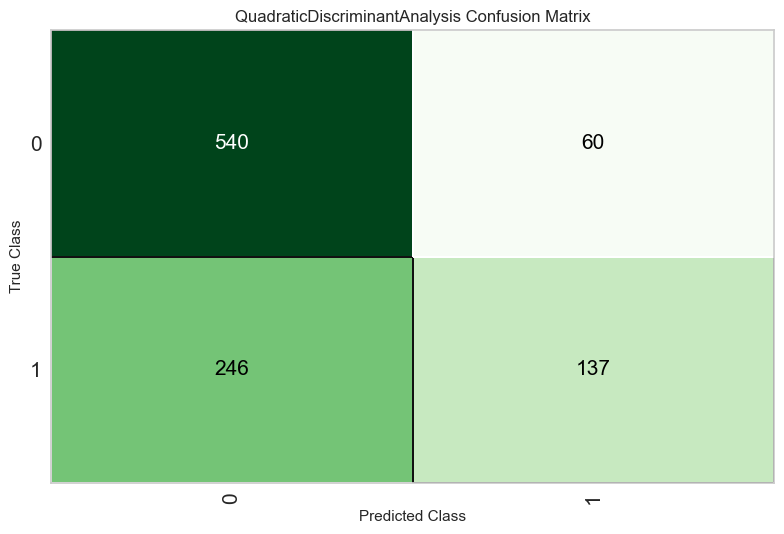

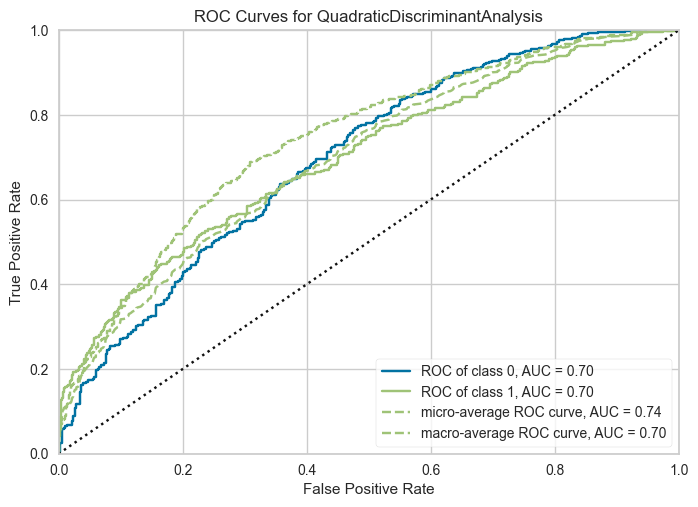

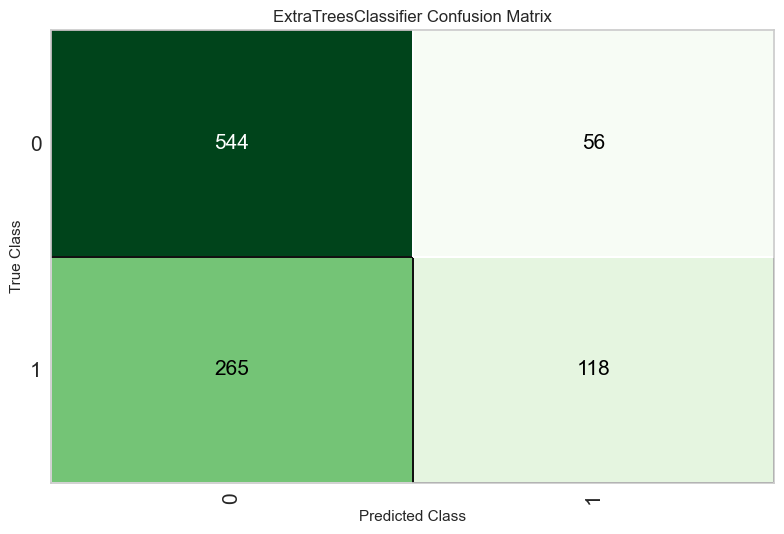

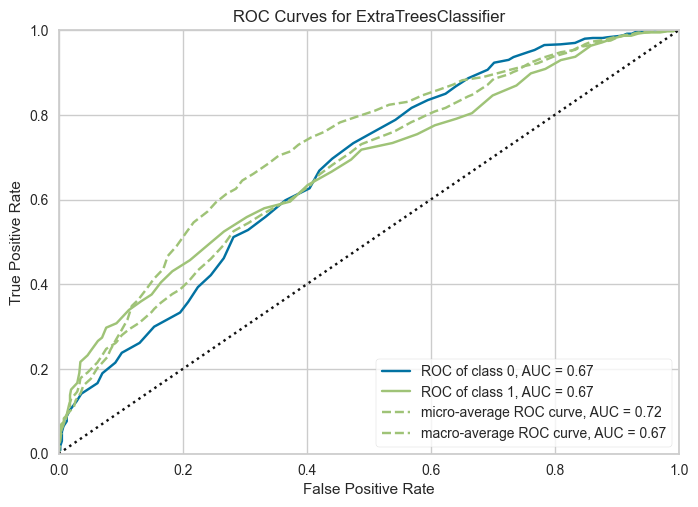

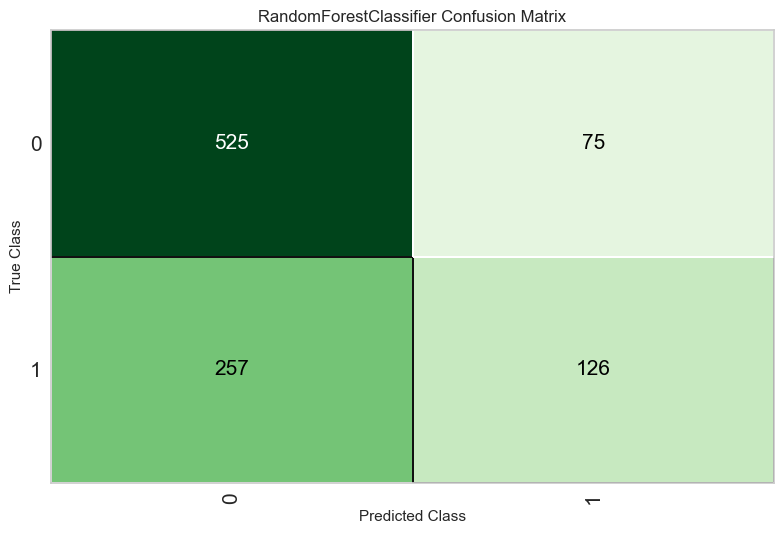

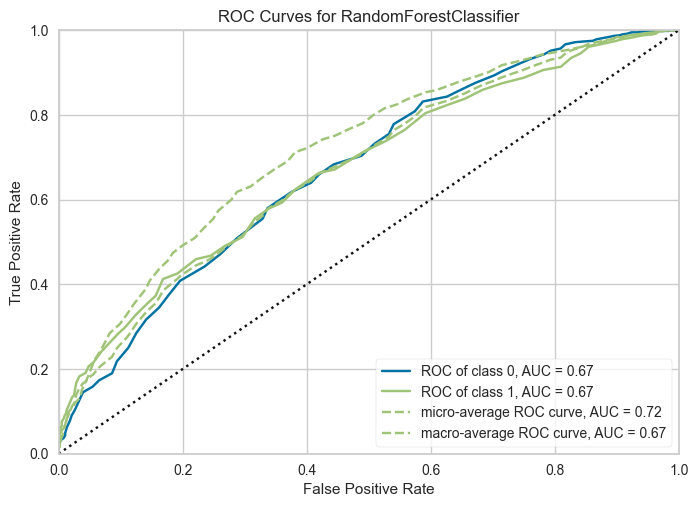

In [20]:
for i in range(0,3):
    plot_model(best_tuned_models[i], 'confusion_matrix')
    plot_model(best_tuned_models[i])

In [21]:
save_model(best_tuned_models[0], model_name = 'water_potability_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\rafae\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ph', 'Hardness', 'Solids',
                                              'Chloramines', 'Sulfate',
                                              'Conductivity', 'Organic_carbon',
                                              'Trihalomethanes', 'Turbidity'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                               

## Creating experiment with Pycaret

In [5]:
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True,
               bin_numeric_features= ['age', 'bmi'])
#lr = create_model('lightgbm')

In [6]:
best = r2.compare_models(n_select=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:14:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [10]:
#plot_model(best)
best_tuned_models = [tune_model(model) for model in best]

#plot_model(best_tuned)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:25:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3036.8229,21795853.9845,4668.6030,0.8698,0.3981,0.3135
1,3348.7346,32550477.2189,5705.3026,0.8107,0.4377,0.3021
2,3080.2499,23240684.2758,4820.8593,0.7057,0.5037,0.3782
3,2898.0848,20401718.6545,4516.8262,0.8296,0.4394,0.3701
4,3180.9365,28357311.7058,5325.1584,0.7891,0.5191,0.2992
5,3087.2990,23879580.9238,4886.6738,0.8464,0.3800,0.2965
6,2753.6129,21900877.3434,4679.8373,0.8510,0.3686,0.2913
7,3388.9945,29581708.8450,5438.9070,0.8373,0.4520,0.2879
8,3277.8110,25196169.0940,5019.5786,0.8373,0.4074,0.3470


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:27:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3034.4302,21879976.5781,4677.6037,0.8693,0.3975,0.3129
1,3300.5646,32341927.0806,5686.9963,0.8120,0.4322,0.2934
2,3051.7872,22928100.2050,4788.3296,0.7097,0.4941,0.3720
3,2826.8058,19647595.0996,4432.5608,0.8359,0.4990,0.3597
4,3155.1250,28365712.6366,5325.9471,0.7890,0.4973,0.2937
5,3078.7002,23867165.3243,4885.4033,0.8465,0.3793,0.2977
6,2758.5557,22238431.9886,4715.7642,0.8487,0.3649,0.2878
7,3381.8512,29544542.8076,5435.4892,0.8375,0.4514,0.2847
8,3236.2408,25023325.2393,5002.3320,0.8384,0.4000,0.3359


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[GradientBoostingRegressor(random_state=123),
 Ridge(random_state=123),
 Lasso(alpha=8.84, random_state=123)]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2521.6623,19126423.5805,4373.3767,0.8661,0.4126,0.3155


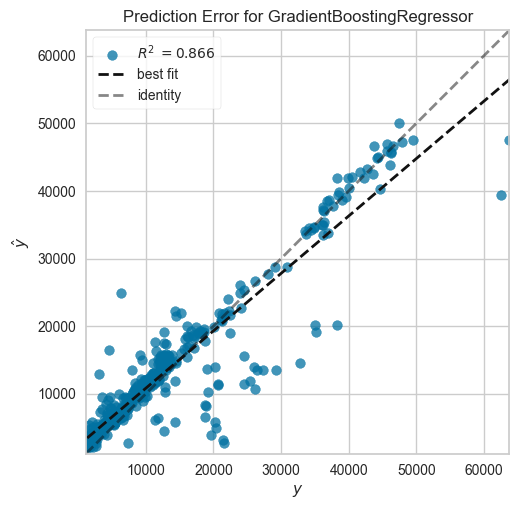

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2521.6623,19126423.5805,4373.3767,0.8661,0.4126,0.3155


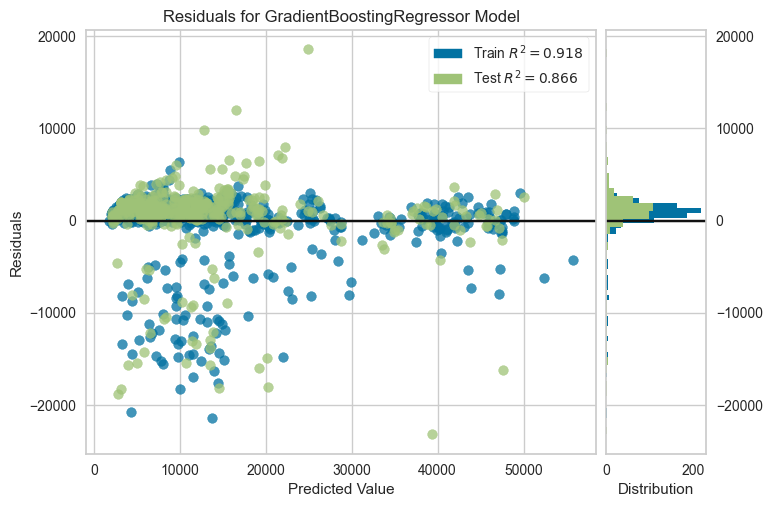

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2521.6623,19126423.5805,4373.3767,0.8661,0.4126,0.3155


GradientBoostingRegressor(random_state=123)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2824.8877,20182438.7027,4492.4869,0.8587,0.3895,0.3053


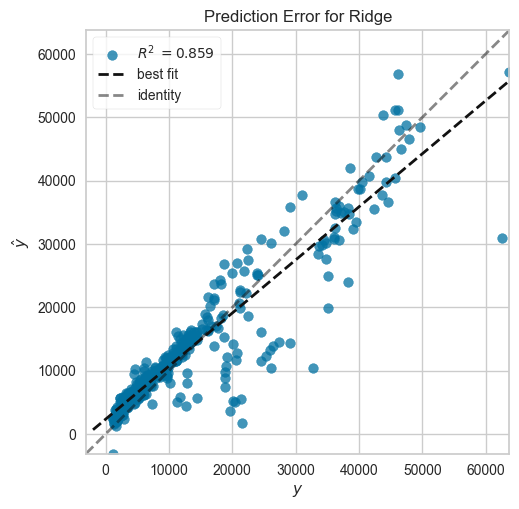

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2824.8877,20182438.7027,4492.4869,0.8587,0.3895,0.3053


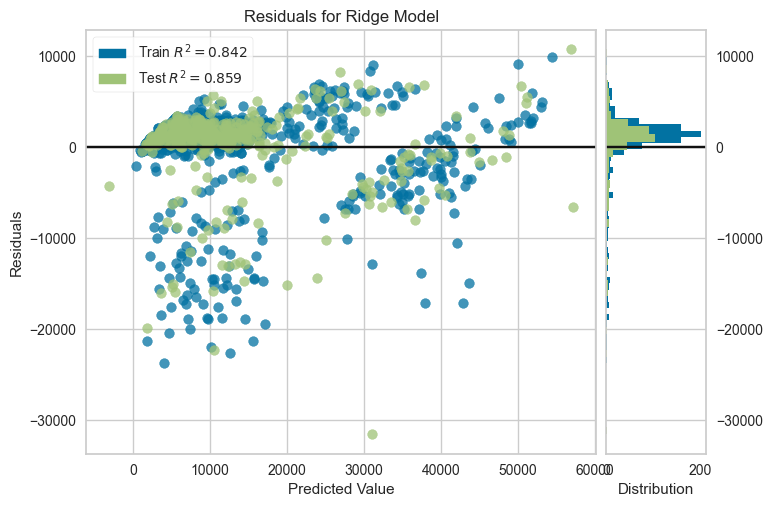

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,2824.8877,20182438.7027,4492.4869,0.8587,0.3895,0.3053


Ridge(random_state=123)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2802.2976,19987696.2698,4470.7601,0.8601,0.3791,0.2991


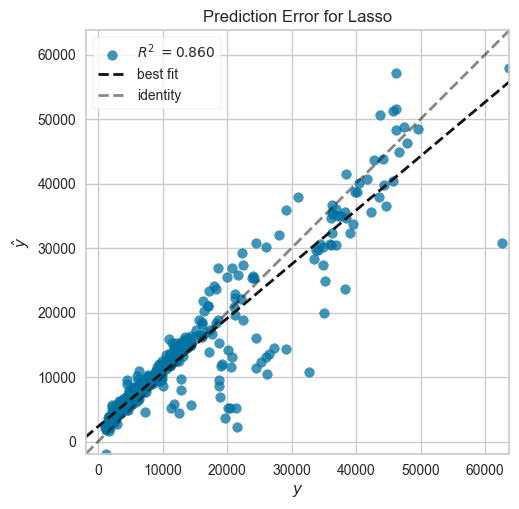

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2802.2976,19987696.2698,4470.7601,0.8601,0.3791,0.2991


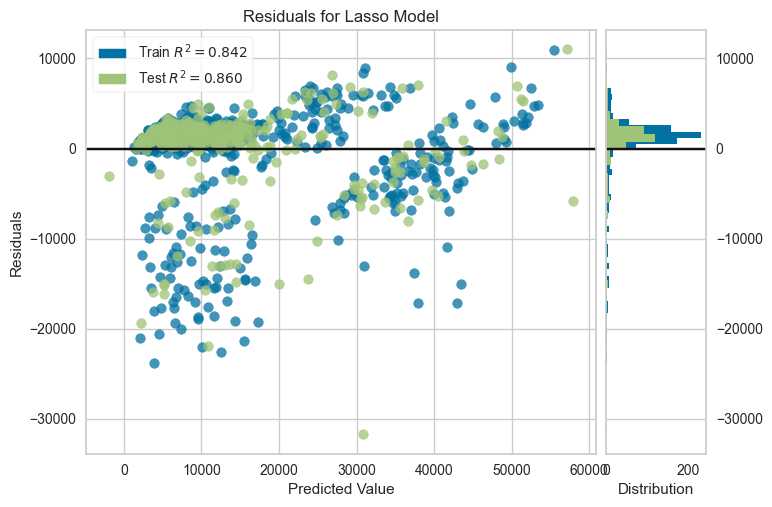

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2802.2976,19987696.2698,4470.7601,0.8601,0.3791,0.2991


Lasso(alpha=8.84, random_state=123)


In [11]:
for i in range(0,3):
    plot_model(best_tuned_models[i], plot='error')
    plot_model(best_tuned_models[i])
    predict_model(best_tuned_models[i])
    print(best_tuned_models[i])

## Saving best (tuned) model for deployment

In [15]:
save_model(best_tuned_models[0], model_name = 'hospital_charges_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\rafae\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerW...
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('normalize', TransformerWrapper(tran